In [1]:
import sys  
sys.path.insert(1, '/Users/clairewest/UIUC/Research/codes/coupled_dipoles/')

from coupled_dipole_model import Sphere_Polarizability
from coupled_dipole_model import CrossSections
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]

In [2]:
w_all = np.arange(2, 3, .01)/hbar_eVs
part1 = 40  # nm
part2 = 30  # nm
gap = 10

all_radii = np.array([part1, part1, part1, 
                      part2, part2, part2
                      ])*1E-7 
def_centers = np.array([ [-part1-gap/2, 0, 0], [-part1-gap/2, 0, 0], [-part1-gap/2, 0, 0],
                         [part2+gap/2, 0, 0], [part2+gap/2, 0, 0], [part2+gap/2, 0, 0],
                        ])*1E-7


unit_vecs = np.array([ [1, 0, 0], [0, 1, 0], [0, 0, 1], 
                       [1, 0, 0], [0, 1, 0], [0, 0, 1], 
                     ])
nback = 1.


num_freq = len(w_all)
num_radii = len(all_radii)


In [3]:
sphere_pol_1 = Sphere_Polarizability(all_radii=np.array([part1, part1, part1])*1E-7,
                                   n=nback, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)    
Cext_iso_1 = np.zeros(len(w_all))
for idx, w_i in enumerate(w_all):
    alphas = np.zeros((3), dtype=complex)
    for i in range(3):
        alphas[i] = sphere_pol_1.alpha(w=w_i, radius=part1*1E-7)

    cross_sec = CrossSections(alphas=alphas,
                             centers=np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]),
                             all_radii=np.array([part1, part1, part1])*1E-7,
                             unit_vecs=np.array([ [1, 0, 0], [0, 1, 0], [0, 0, 1]]),
                             w=w_i,
                             n=nback,
                             )
    Cext = cross_sec.cross_sects(drive=np.array([1,0,0]))
    Cext_iso_1[idx] = Cext[0] + Cext[1] + Cext[2]
######################################################################################

sphere_pol_2 = Sphere_Polarizability(all_radii=np.array([part2, part2, part2])*1E-7,
                                   n=nback, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)    
Cext_iso_2 = np.zeros(len(w_all))
for idx, w_i in enumerate(w_all):
    alphas = np.zeros((3), dtype=complex)
    for i in range(3):
        alphas[i] = sphere_pol_2.alpha(w=w_i, radius=part2*1E-7)

    cross_sec = CrossSections(alphas=alphas,
                             centers=np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]),
                             all_radii=np.array([part2, part2, part2])*1E-7,
                             unit_vecs=np.array([ [1, 0, 0], [0, 1, 0], [0, 0, 1]]),
                             w=w_i,
                             n=nback,
                             )
    Cext = cross_sec.cross_sects(drive=np.array([1,0,0]))
    Cext_iso_2[idx] = Cext[0] + Cext[1] + Cext[2]


    
    


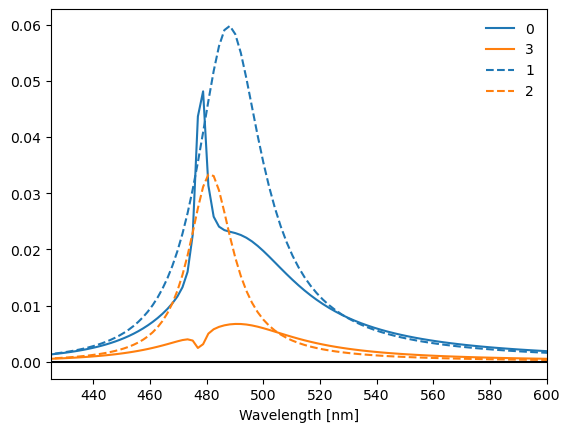

In [4]:
sphere_pol = Sphere_Polarizability(all_radii=all_radii,
                                   n=nback, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs,
                                   )    
Cext_0 = np.zeros(len(w_all))
Cext_1 = np.zeros(len(w_all))
Cext_2 = np.zeros(len(w_all))
Cext_3 = np.zeros(len(w_all))
Cext_4 = np.zeros(len(w_all))
Cext_5 = np.zeros(len(w_all))

for idx, w_i in enumerate(w_all):
    alphas = np.zeros((num_radii), dtype=complex)
    for i in range(num_radii):
        alphas[i] = sphere_pol.alpha(w=w_i, radius=all_radii[i])

    cross_sec = CrossSections(alphas=alphas,
                             centers=def_centers,
                             all_radii=all_radii,
                             unit_vecs=unit_vecs,
                             w=w_i,
                             n=nback,
                             )
    Cext = cross_sec.cross_sects(drive=np.array([1,0,0]))

    Cext_0[idx], Cext_1[idx], Cext_2[idx], Cext_3[idx], Cext_4[idx], Cext_5[idx] = Cext
#     break
    
    
plt.plot(1240/(w_all*hbar_eVs), Cext_0, label='0',)
# plt.plot(1240/(w_all*hbar_eVs), Cext_1+.01, label='1',)
# plt.plot(1240/(w_all*hbar_eVs), Cext_2+.02, label='2',) 
plt.plot(1240/(w_all*hbar_eVs), Cext_3, label='3',) 
# plt.plot(1240/(w_all*hbar_eVs), Cext_4+.04, label='4',) 
# plt.plot(1240/(w_all*hbar_eVs), Cext_5+.05, label='5',) 


# plt.plot(1240/(w_all*hbar_eVs), Cext_1, label='1', color='tab:blue', alpha=.5)
plt.plot(1240/(w_all*hbar_eVs), Cext_iso_1, label='1', linestyle='--', color='tab:blue')

# plt.plot(1240/(w_all*hbar_eVs), Cext_2, label='2',  color='tab:orange', alpha=.5)
plt.plot(1240/(w_all*hbar_eVs), Cext_iso_2, label='2', linestyle='--', color='tab:orange')

# plt.plot(1240/(w_all*hbar_eVs), Cext_1 + Cext_2, label='tot', color='tab:green')

plt.legend(frameon=False)
plt.xlabel('Wavelength [nm]')
plt.plot([400,600], [0,0], color='k')
plt.xlim([425, 600]);